<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Modelos_Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Importar las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Cargar el archivo al DataFrame
df = pd.read_csv("Fish.csv")

In [ ]:
#Mostrar el Dataframe
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Podemos realizar un análisis exploratorio de los datos:

In [ ]:
#Verificar tipo de datos de las columnas de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
#Identificar metricas estadisticas
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
#Identificar valores de las variables por especie
df.value_counts()

Species    Weight  Length1  Length2  Length3  Height   Width 
Bream      242.0   23.2     25.4     30.0     11.5200  4.0200    1
Pike       500.0   42.0     45.0     48.0     6.9600   4.8960    1
           200.0   30.0     32.3     34.8     5.5680   3.3756    1
           300.0   31.7     34.0     37.8     5.7078   4.1580    1
                   32.7     35.0     38.8     5.9364   4.3844    1
                                                                ..
Perch      85.0    18.2     20.0     21.0     5.0820   2.7720    1
           100.0   16.2     18.0     19.2     5.2224   3.3216    1
           110.0   19.0     21.0     22.5     5.6925   3.5550    1
                   20.0     22.0     23.5     5.5225   3.9950    1
Whitefish  1000.0  37.3     40.0     43.5     12.3540  6.5250    1
Name: count, Length: 159, dtype: int64

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

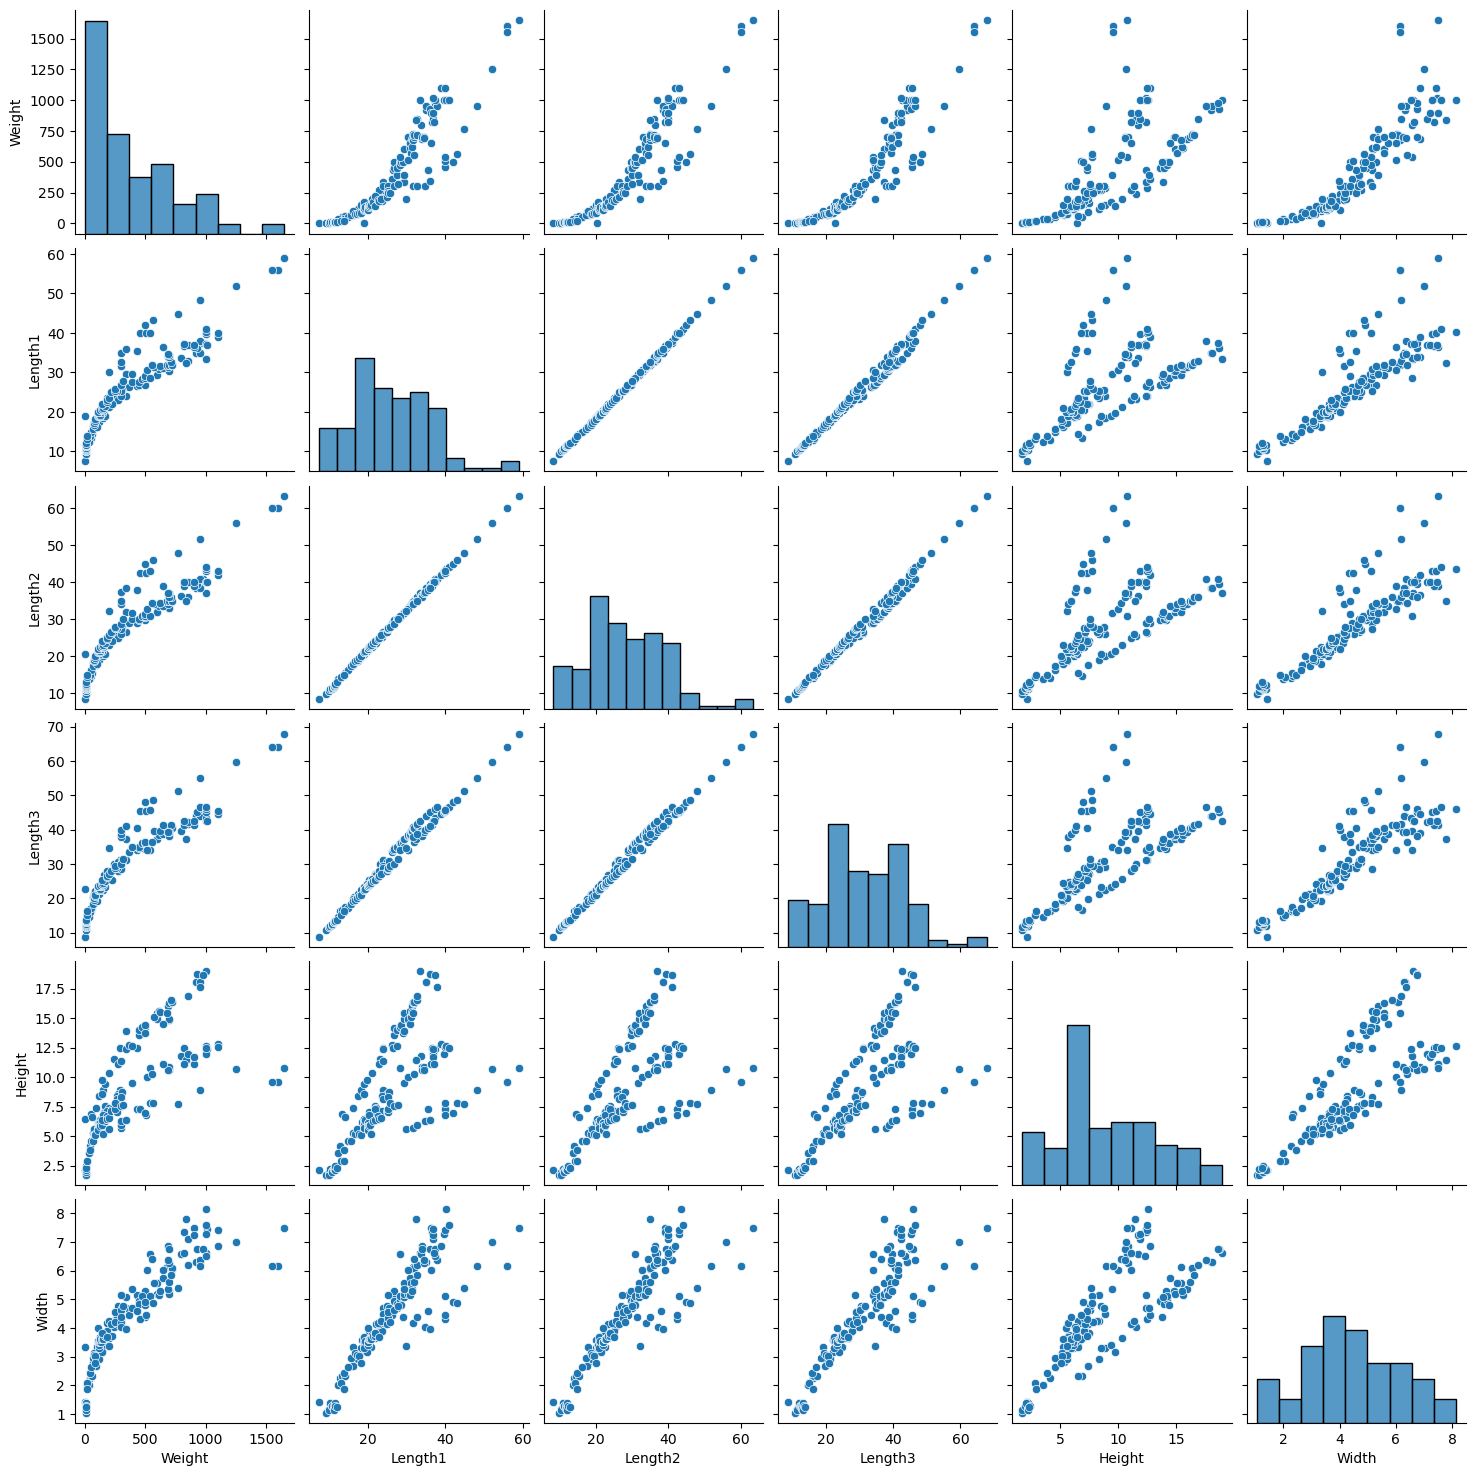

In [ ]:
#Ejecutar grafico para revisar correlacción entre cada una de las columnas
sns.pairplot(df)

1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un
cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr²,
donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos
bases circulares.

In [ ]:
#Crear una nueva columna con el volumen del pez, asumiendolo como un cilindro
df["Volume"] = np.pi*df['Height']*(df['Width']/2)**2

In [ ]:
#Mostrar el DataFrame con la nueva columna
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,198.477454
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,257.609344


2.  Verifica la correlación posible entre las variables, numérica y graficamente.
¿Aumenta la correlación al añadir el volumen? Explica.


In [ ]:
#Verificar correlacción numérica
#Crear un nuevo DataFrame con las columnas numéricas
df_corr = df.loc[:,["Weight", "Length1", "Length2", "Length3", "Height", "Width", "Volume"]]

In [ ]:
#Aplicar método corr() al nuevo DF para verificar la correlacción numérica entre las variables
df_corr.corr()

,Weight,Length1,Length2,Length3,Height,Width,Volume
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.881981
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.732409
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.741313
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.767774
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.868256
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.905626
Volume,0.881981,0.732409,0.741313,0.767774,0.868256,0.905626,1.000000


De lo anterior, analizamos que las correlacciones entre todas las variables es positiva, por lo cual es directamente proporcional para cada uno de los casos, es decir sí aumenta el valor de una variable, también aumentará el valor de la otra; a su vez, sí disminuye el valor de una variable, el mismo comportamiento se observará en la otra.

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

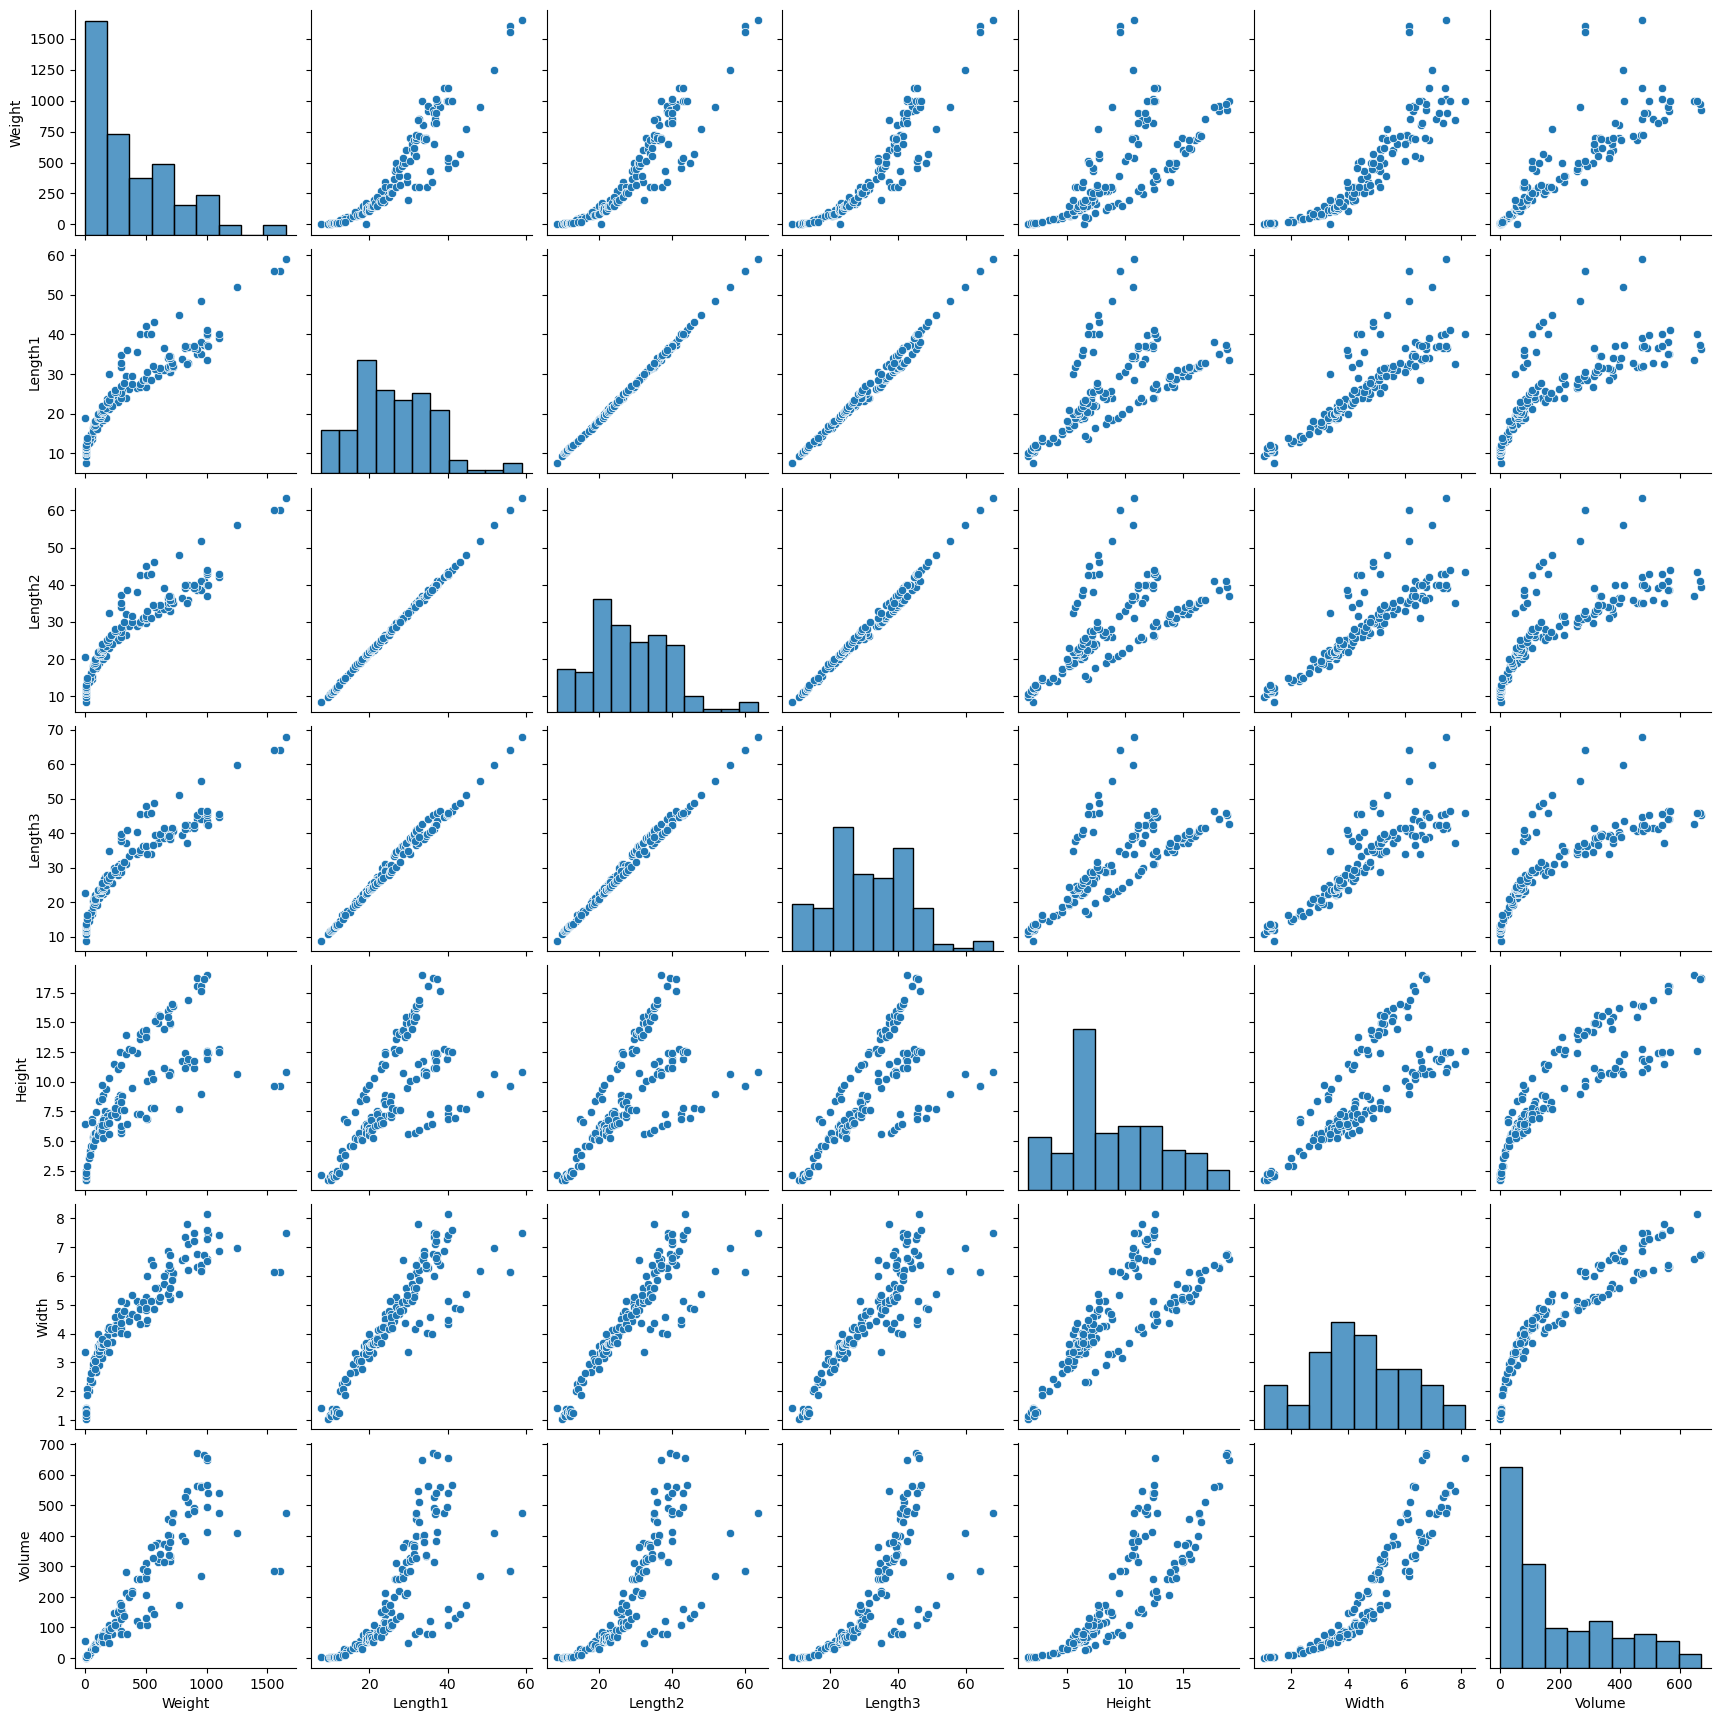

In [ ]:
#Mostrar el pariplot para el nuevo DF con las correlacciones
sns.pairplot(df_corr)

De acuerdo a lo anterior, se observa y se infiere que no aumenta la correlacción al añadir el volumen debido a que no cambian los datos del DF, unicamente se añade una nueva columna. Por lo anterior, no hay cambios en el comportamiento con respecto a la correlacción de las variables.

3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los
peces. Realiza una breve evaluación del modelo y graficalo.calo.

Weight = y (variable dependiente u objetiva)

Volume = x (variable independiente o predictor)

In [ ]:
#Filtrar columnas necesarias
df1 = df[["Weight", "Volume"]]

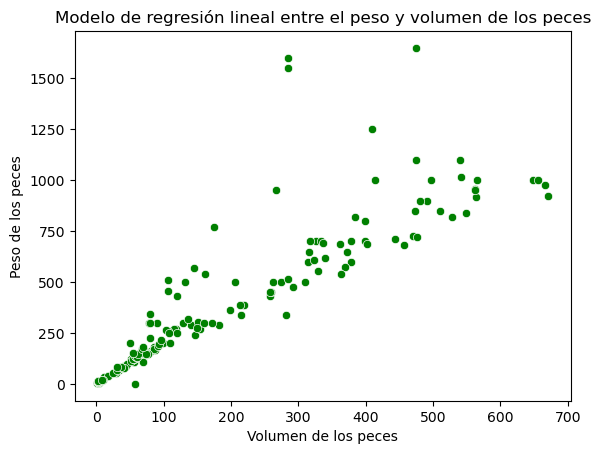

In [ ]:
#Graficar el modelo
sns.scatterplot(x="Volume", y="Weight", data=df1, color="green")
plt.title("Modelo de regresión lineal entre el peso y volumen de los peces")
plt.xlabel("Volumen de los peces")
plt.ylabel("Peso de los peces")
plt.show()

In [ ]:
#Validar correlacción positiva
df1.corr()

,Weight,Volume
Weight,1.000000,0.881981
Volume,0.881981,1.000000


De lo anterior, observamos que tanto la correlacción numérica como gráfica muestran que ambas variables se mueven en la misma dirección, razón por lo cual es positiva.

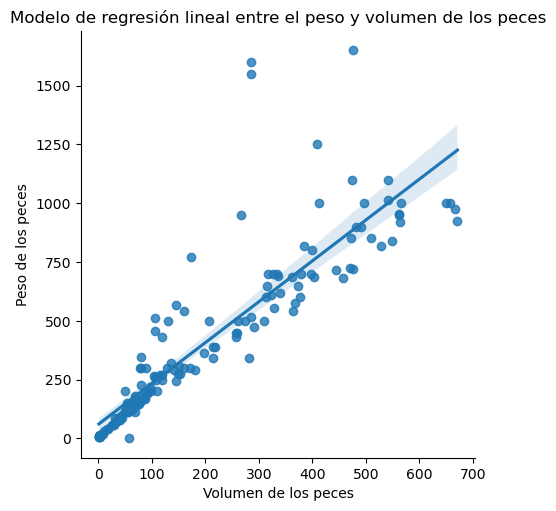

Pendiente: 1.7395956908112613
Intercepto: 58.74007899977153
Coef. de correlacción: 0.8819813276865703
Error estandar: 0.0741860287601897


In [ ]:
#Realizar la regresión lineal
sns.lmplot(x="Volume", y="Weight", data=df1)
plt.title("Modelo de regresión lineal entre el peso y volumen de los peces")
plt.xlabel("Volumen de los peces")
plt.ylabel("Peso de los peces")

#Calcular los valores de la regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Volume"], df["Weight"])

#Mostrar el gráfico
plt.show()

print(f"Pendiente: {slope}")
print(f"Intercepto: {intercept}")
print(f"Coef. de correlacción: {r_value}")
print(f"Error estandar: {std_err}")

De lo anterior, analizamos:
1. Cuando el volumen del pez aumenta en 1 unidad, el peso aumenta en 1.73 unidades.
2. Cuando el volumen del pez es cero, el peso del pez es 58.74 (lo cual, no tiene mucho sentido para este ejemplo, sin embargo teoricamente es lo que significa este resultado).
3. Hay una fuerte correlacción positiva entre el volumen y el peso de los peces debido a que r_value o el coeficiente de correlacción pearson es cercano a 1.
4. El error estandar es minimo.

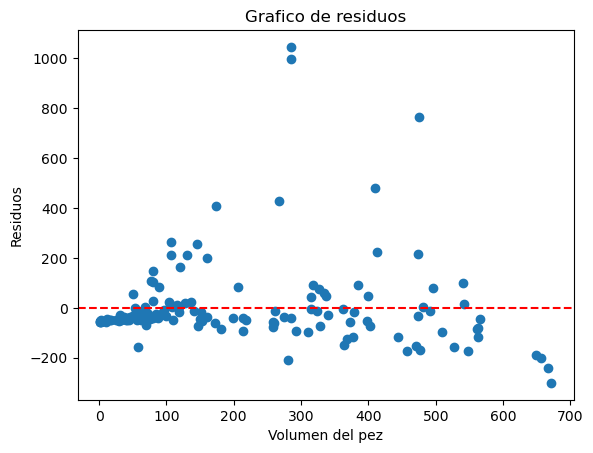

In [ ]:
#Analizar residuos
#Formula --> E = y - (Bo + B1X1)
residuals = df["Weight"] - (slope * df["Volume"] + intercept)
plt.figure()
plt.scatter(df["Volume"], residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Grafico de residuos")
plt.xlabel("Volumen del pez")
plt.ylabel("Residuos")
plt.show()

Para el caso anterior, los residuos distribuidos aleatoriamente alrededor de y = 0, sugieren que el modelo está ajustando los datos de manera apropiada. Para los casos en los cuales, los puntos estan distantes de la línea, se indica que el modelo no predice bien esos puntos en particular.

A continuación, preparamos los datos para realizar regresión lineal, esta vez usando la liberia statsmodels importada como sm:

In [ ]:
X = df["Volume"]
X.head()

0    146.215854
1    181.707071
2    214.391723
3    198.477454
4    257.609344
Name: Volume, dtype: float64

In [ ]:
#Añadir la constante para el intercepto del predictor
X = sm.add_constant(X)
X.head()

,const,Volume
0,1.0,146.215854
1,1.0,181.707071
2,1.0,214.391723
3,1.0,198.477454
4,1.0,257.609344


In [ ]:
y = df["Weight"]

In [ ]:
#Crear el modelo
#Fit sirve para entrenar el modelo (ajuste)
model= sm.OLS(y, X).fit()

In [ ]:
#Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     549.9
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.65e-53
Time:                        17:56:30   Log-Likelihood:                -1040.5
No. Observations:                 159   AIC:                             2085.
Df Residuals:                     157   BIC:                             2091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7401     19.745      2.975      0.0

Análisis del resumen obtenido:
1. R-squared: esta cerca a 1, lo que significa que el modelo explica bien la variabilidad de los datos, hay buenas predicciones. Siendo así, el 77% de la variabilidad en y (peso) se puede explicar por la variabilidad en x(volumen).
   
Como se explico en los resultados obtenidos arriba:

2. Cuando el volumen es 0, el peso predicho es 58.74  (intercepto).
3. Cuando el volumen aumenta en 1 unidad, entonces el peso aumenta en 1.73 unidades.

Por otro lado:

4. Debido a que el valor p es bajo (0.000), el volumen tiene un efecto estadísticamente significativo sobre el peso (p<0.05)
5. Con un 95% de certeza, el verdadero coeficiente se encuentra entre 1.593 y 1.886.
6. El valor del estadistico F del volumen es bastante alto (23.449), lo que significa que el coeficientes es confiable, y por ende estadisticamente significativo.

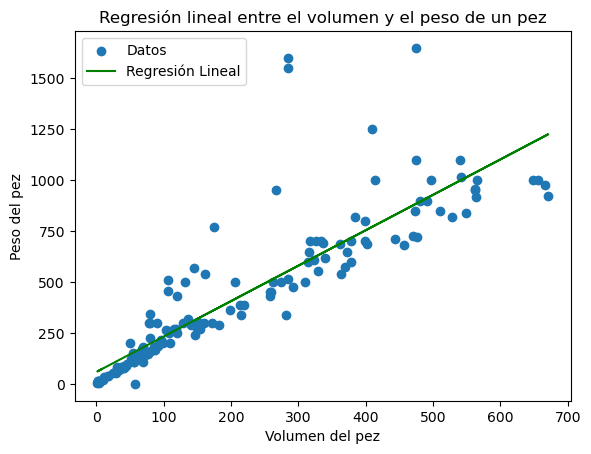

In [ ]:
#Graficar la regresión lineal
plt.scatter(df["Volume"], df["Weight"], label="Datos")
plt.plot(df["Volume"], model.predict(X), color='green', label="Regresión Lineal")  #predecimos los valores de y
plt.title("Regresión lineal entre el volumen y el peso de un pez")
plt.xlabel("Volumen del pez")
plt.ylabel("Peso del pez")
plt.legend()
plt.show()

In [ ]:
#Ahora, se predice el modelo y se coomparan los datos
#Datos estimados
model.predict(X)

0      313.096549
1      374.836916
2      431.694997
3      404.010603
4      506.876185
          ...    
154     64.286896
155     64.086556
156     63.646244
157     75.512996
158     72.887517
Length: 159, dtype: float64

In [ ]:
#Datos reales
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [ ]:
y_hat= model.predict(X)

In [ ]:
#Calular el error absoluto medio (MAE)
#MAE corresponde al promedio de las diferencias absolutas entre los valores estimados o predichos y los reales
median_absolute_error(y, y_hat)

49.64184000530307

De lo anterior, confirmamos que la diferencia es en 49.64 unidades

In [ ]:
y.describe()

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

La desviación estandar es mayor al error obtenido. Para este caso, se considera que el error absoluto medio es bueno.

In [ ]:
#Aplicar la formula para obtener el resultado
# y = Bo (intercepto) + B1*X (coeficiente del volumen * volumen)
y = 58.7401 + (146.215854*1.7396)

In [ ]:
y

313.0971996184

3. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces?
Explica.

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,198.477454
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,257.609344


In [ ]:
df["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [ ]:
#Eliminar filas con valores faltantes
df_cleaned = df.dropna(subset=['Volume', 'Weight'])

#Filtrar los datos por especie
Peces_Perch = df_cleaned[df_cleaned['Species'] == 'Perch']
Peces_Bream = df_cleaned[df_cleaned['Species'] == 'Bream']
Peces_Roach = df_cleaned[df_cleaned['Species'] == 'Roach']
Peces_Pike = df_cleaned[df_cleaned['Species'] == 'Smelt']
Peces_Parkki = df_cleaned[df_cleaned['Species'] == 'Parkki']
Peces_Whitefish = df_cleaned[df_cleaned['Species'] == 'Whitefish']

#Crear modelos de regresión lineal para cada especie
model_Perch = sm.OLS(Peces_Perch['Volume'], sm.add_constant(Peces_Perch['Weight'])).fit()
model_Bream = sm.OLS(Peces_Bream['Volume'], sm.add_constant(Peces_Bream['Weight'])).fit()
model_Roach = sm.OLS(Peces_Roach['Volume'], sm.add_constant(Peces_Roach['Weight'])).fit()
model_Pike = sm.OLS(Peces_Pike['Volume'], sm.add_constant(Peces_Pike['Weight'])).fit()
model_Parkki = sm.OLS(Peces_Parkki['Volume'], sm.add_constant(Peces_Parkki['Weight'])).fit()
model_Whitefish = sm.OLS(Peces_Whitefish['Volume'], sm.add_constant(Peces_Whitefish['Weight'])).fit()

#Obtener las predicciones de cada modelo
predictions_Perch = model_Perch.predict()
predictions_Bream = model_Bream.predict()
predictions_Roach = model_Roach.predict()
predictions_Pike = model_Pike.predict()
predictions_Parkki = model_Parkki.predict()
predictions_Whitefish = model_Whitefish.predict()

#Calcular el Error Cuadrático Medio (MSE) para cada modelo
mse_Perch = ((Peces_Perch['Volume'] - predictions_Perch) ** 2).mean()
mse_Bream = ((Peces_Bream['Volume'] - predictions_Bream) ** 2).mean()
mse_Roach = ((Peces_Roach['Volume'] - predictions_Roach) ** 2).mean()
mse_Pike = ((Peces_Pike['Volume'] - predictions_Pike) ** 2).mean()
mse_Parkki= ((Peces_Parkki['Volume'] - predictions_Parkki) ** 2).mean()
mse_Whitefish = ((Peces_Whitefish['Volume'] - predictions_Whitefish) ** 2).mean()

#Calcular el Error Cuadrático Medio Explicado (EMSE) para cada modelo
emse_Perch = mse_Perch / ((Peces_Perch['Volume'] - Peces_Perch['Volume'].mean()) ** 2).mean()
emse_Bream = mse_Bream / ((Peces_Bream['Volume'] - Peces_Bream['Volume'].mean()) ** 2).mean()
emse_Roach = mse_Roach / ((Peces_Roach['Volume'] - Peces_Roach['Volume'].mean()) ** 2).mean()
emse_Pike = mse_Pike / ((Peces_Pike['Volume'] - Peces_Pike['Volume'].mean()) ** 2).mean()
emse_Parkki = mse_Parkki / ((Peces_Parkki['Volume'] - Peces_Parkki['Volume'].mean()) ** 2).mean()
emse_Whitefish = mse_Whitefish / ((Peces_Whitefish['Volume'] - Peces_Whitefish['Volume'].mean()) ** 2).mean()

#Calcular el Coeficiente de Determinación (R²) para cada modelo
r2_Perch = model_Perch.rsquared
r2_Bream = model_Bream.rsquared
r2_Roach = model_Roach.rsquared
r2_Pike = model_Pike.rsquared
r2_Parkki = model_Parkki.rsquared
r2_Whitefish = model_Whitefish.rsquared

#Calcular el Error Absoluto Medio (MAE) para cada modelo
mae_Perch = (abs(Peces_Perch['Volume'] - predictions_Perch)).mean()
mae_Bream = (abs(Peces_Bream['Volume'] - predictions_Bream)).mean()
mae_Roach = (abs(Peces_Roach['Volume'] - predictions_Roach)).mean()
mae_Pike = (abs(Peces_Pike['Volume'] - predictions_Pike)).mean()
mae_Parkki = (abs(Peces_Parkki['Volume'] - predictions_Parkki)).mean()
mae_Whitefish = (abs(Peces_Whitefish['Volume'] - predictions_Whitefish)).mean()

#Mostrar los resultados
print("Modelo para peces Perch:")
print(f"R²: {r2_Perch:.2f}, MSE: {mse_Perch:.2f}, EMSE: {emse_Perch:.2f}, MAE: {mae_Perch:.2f}")

print("\nModelo para peces Bream:")
print(f"R²: {r2_Bream:.2f}, MSE: {mse_Bream:.2f}, EMSE: {emse_Bream:.2f}, MAE: {mae_Bream:.2f}")

print("\nModelo para peces Roach:")
print(f"R²: {r2_Roach:.2f}, MSE: {mse_Roach:.2f}, EMSE: {emse_Roach:.2f}, MAE: {mae_Roach:.2f}")

print("\nModelo para peces Pike:")
print(f"R²: {r2_Pike:.2f}, MSE: {mse_Pike:.2f}, EMSE: {emse_Pike:.2f}, MAE: {mae_Pike:.2f}")

print("\nModelo para peces Parkki:")
print(f"R²: {r2_Parkki:.2f}, MSE: {mse_Parkki:.2f}, EMSE: {emse_Parkki:.2f}, MAE: {mae_Parkki:.2f}")

print("\nModelo para peces Whitefish:")
print(f"R²: {r2_Whitefish:.2f}, MSE: {mse_Whitefish:.2f}, EMSE: {emse_Whitefish:.2f}, MAE: {mae_Whitefish:.2f}")

Modelo para peces Perch:
R²: 0.97, MSE: 1201.06, EMSE: 0.03, MAE: 21.43

Modelo para peces Bream:
R²: 0.90, MSE: 2039.37, EMSE: 0.10, MAE: 34.29

Modelo para peces Roach:
R²: 0.89, MSE: 222.34, EMSE: 0.11, MAE: 9.35

Modelo para peces Pike:
R²: 0.88, MSE: 0.64, EMSE: 0.12, MAE: 0.63

Modelo para peces Parkki:
R²: 1.00, MSE: 8.08, EMSE: 0.00, MAE: 2.49

Modelo para peces Whitefish:
R²: 0.86, MSE: 2469.83, EMSE: 0.14, MAE: 40.27


Análisis:
1. Los modelos son similares en cuanto a nivel de ajuste (R²), el mejor ajuste corresponde a los peces Parkki (1.00).
2. El error cuadrático medio (MSE) que muestra mejor precisión (es menor) corresponde a la especie de peces Pike (0.64), seguido de la especie de peces Parkki (8.08).
3. En cuanto al error cuadrático medio explicado (EMSE), el más bajo corresponde a la especies de peces Parkki (0.00), por lo que este modelo es el que mejor explica la variabilidad de los datos.
4. En cuanto al error absoluto medio (MAE), el más bajo corresponde a la especie de peces Pike (0.63), por lo que para este caso se considera mejor en terminos de precisión. Seguido la especie de peces Parkki (2.49).

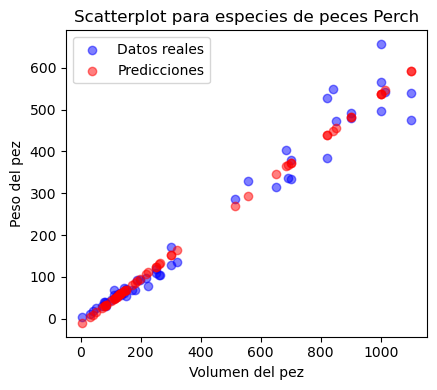

In [ ]:
#Scatterplot para especies de peces Perch
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(Peces_Perch['Weight'], Peces_Perch['Volume'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(Peces_Perch['Weight'], predictions_Perch, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Volumen del pez')
plt.ylabel('Peso del pez')
plt.title('Scatterplot para especies de peces Perch')
plt.legend()

#Mostrar el scatterplot
plt.tight_layout()
plt.show()

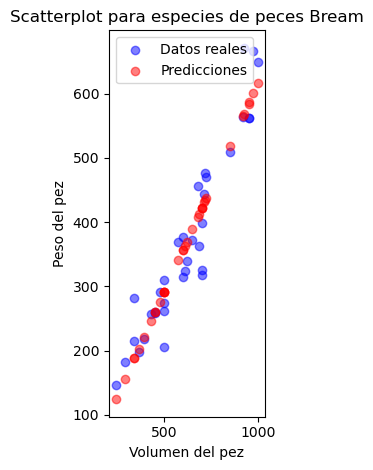

In [ ]:
#Scatterplot para especies de peces Bream
plt.subplot(1, 3, 2)
plt.scatter(Peces_Bream['Weight'], Peces_Bream['Volume'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(Peces_Bream['Weight'], predictions_Bream, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Volumen del pez')
plt.ylabel('Peso del pez')
plt.title('Scatterplot para especies de peces Bream')
plt.legend()
plt.tight_layout()
plt.show()

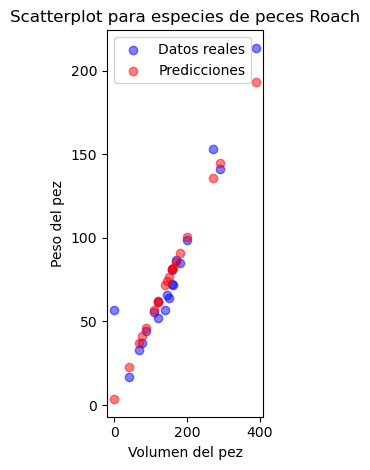

In [ ]:
#Scatterplot para especies de peces Roach
plt.subplot(1, 3, 2)
plt.scatter(Peces_Roach['Weight'], Peces_Roach['Volume'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(Peces_Roach['Weight'], predictions_Roach, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Volumen del pez')
plt.ylabel('Peso del pez')
plt.title('Scatterplot para especies de peces Roach')
plt.legend()
plt.tight_layout()
plt.show()

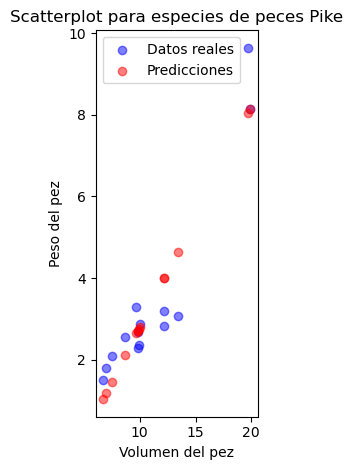

In [ ]:
#Scatterplot para especies de peces Pike
plt.subplot(1, 3, 2)
plt.scatter(Peces_Pike['Weight'], Peces_Pike['Volume'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(Peces_Pike['Weight'], predictions_Pike, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Volumen del pez')
plt.ylabel('Peso del pez')
plt.title('Scatterplot para especies de peces Pike')
plt.legend()
plt.tight_layout()
plt.show()

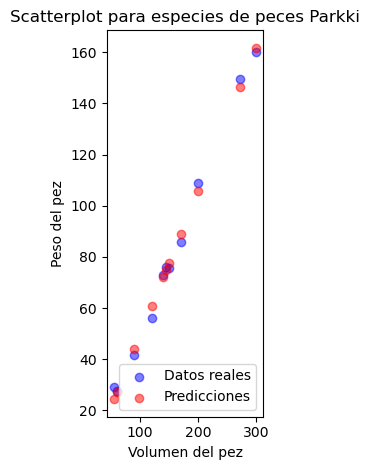

In [ ]:
#Scatterplot para especies de peces Parkki
plt.subplot(1, 3, 2)
plt.scatter(Peces_Parkki['Weight'], Peces_Parkki['Volume'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(Peces_Parkki['Weight'], predictions_Parkki, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Volumen del pez')
plt.ylabel('Peso del pez')
plt.title('Scatterplot para especies de peces Parkki')
plt.legend()
plt.tight_layout()
plt.show()

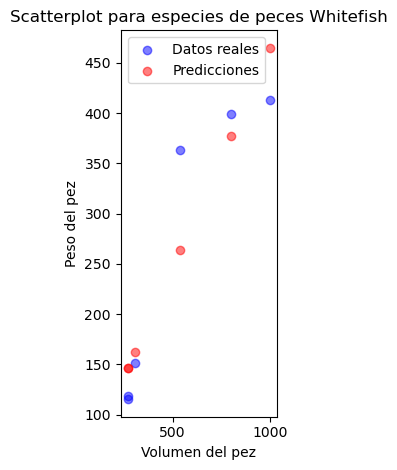

In [ ]:
#Scatterplot para especies de peces Whitefish
plt.subplot(1, 3, 2)
plt.scatter(Peces_Whitefish['Weight'], Peces_Whitefish['Volume'], label='Datos reales', color='blue', alpha=0.5)
plt.scatter(Peces_Whitefish['Weight'], predictions_Whitefish, label='Predicciones', color='red', alpha=0.5)
plt.xlabel('Volumen del pez')
plt.ylabel('Peso del pez')
plt.title('Scatterplot para especies de peces Whitefish')
plt.legend()
plt.tight_layout()
plt.show()

4. Construye un modelo de regresión que relacione dos o más variables con el peso de
los peces. Realiza una breve evaluación del modelo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
 7   Volume   159 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.1+ KB


Variable dependiente, objetiva o de respuesta (y) = peso (Weight) de los peces.

Variables independientes o predictores (x):
1. Altura (Height).
2. Ancho (Width).
3. Lenght1 (Longitud 1).
4. Lenght2 (Longitud 2).

In [ ]:
#Definir variables predictoras (X) y variable de respuesta (y)
X = df[['Height', 'Width', 'Length1', 'Length2']]
y = df['Weight']

In [ ]:
#Agregar una constante (intercepto) a las variables predictoras
X = sm.add_constant(X)
X

,const,Height,Width,Length1,Length2
0,1.0,11.5200,4.0200,23.2,25.4
1,1.0,12.4800,4.3056,24.0,26.3
2,1.0,12.3778,4.6961,23.9,26.5
3,1.0,12.7300,4.4555,26.3,29.0
4,1.0,12.4440,5.1340,26.5,29.0
...,...,...,...,...,...
154,1.0,2.0904,1.3936,11.5,12.2
155,1.0,2.4300,1.2690,11.7,12.4
156,1.0,2.2770,1.2558,12.1,13.0
157,1.0,2.8728,2.0672,13.2,14.3


In [ ]:
#Construir el modelo de regresión lineal
model = sm.OLS(y, X).fit()

In [ ]:
results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     291.1
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.08e-70
Time:                        17:56:32   Log-Likelihood:                -989.40
No. Observations:                 159   AIC:                             1989.
Df Residuals:                     154   BIC:                             2004.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -508.6387     29.242    -17.394      0.000    -566.406    -450.871
Height        15.7293      4.469      3.519      0.001       6.900      24.559
Width         44.9741     15.388      2.923      0.004      14.575      75.373
Length1       59.4637     40.405      1.472      0.143     -20.357     139.284
Length2      -34.9654     38.363     -0.911      0.363    -110.751      40.820
==============================================================================
Omnibus:                       19.581   Durbin-Watson:                   0.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.221
Skew:                           0.777   Prob(JB):                     5.50e-06
Kurtosis:                       4.113   Cond. No.                         244.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análisis del resumen obtenido:
1. R-squared: esta cerca a 1, lo que significa que el modelo explica bien la variabilidad de los datos, hay buenas predicciones. Siendo así, el 88% de la variabilidad en y (peso) se puede explicar por la variabilidad en x(altura, ancho y ambas longitudes).
2. Cuando el valor de las variables independientes es 0, el peso predicho es -508.6387  (intercepto).
3. Cuando la altura aumenta en 1 unidad, entonces el peso aumenta en 15.7293 unidades.
4. Cuando el ancho aumenta en 1 unidad, entonces el peso aumenta en 44.9741 unidades.
5. Cuando la longitud 1 aumenta en 1 unidad, entonces el peso aumenta en 59.4637 unidades.
6. Cuando la longitud 2 aumenta en 1 unidad, entonces el peso aumenta en 34.9654 unidades.
7. Debido a que el valor p es bajo para la altura y el ancho, estos tienen un efecto estadísticamente significativo sobre el peso (p<0.05).
8. Para el caso de las longitudes, el efecto no es tan estadisticamente significativo (p>0.05).
9. Con un 95% de certeza, el verdadero coeficiente para la altura se encuentra entre 6.900 y 24.559.
10. Con un 95% de certeza, el verdadero coeficiente para el ancho se encuentra entre 14.575 y 75.373.
11. Con un 95% de certeza, el verdadero coeficiente para la longitud 1 se encuentra entre -20.357 y 139.284.
12. Con un 95% de certeza, el verdadero coeficiente para la longitud 2 se encuentra entre -110.751 y 40.820.
13. El valor del estadistico F de la altura es bastante alto (3.519), lo que significa que el coeficientes es confiable, y por ende estadisticamente significativo. Despues, le sigue el ancho (2.923)
14. El error estandar más bajo corresponde a la altura (4.469), seguido del ancho de los peces (15.388).

In [ ]:
#Valores estimados o predichos
model.predict(X)

0      344.794189
1      388.840994
2      391.856387
3      441.874725
4      479.783785
          ...    
154   -155.828309
155   -151.190751
156   -151.384785
157    -85.566298
158    -81.884702
Length: 159, dtype: float64

In [ ]:
#Valores reales
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [ ]:
y_hat= model.predict(X)

In [ ]:
#Error absoluto medio
MAE = median_absolute_error(y, y_hat)
print("Error absoluto medio: ", MAE)

#Error cuadratico medio
MSE = mean_squared_error(y, y_hat)
print("Error cuadratico medio: ", MSE)

y_media = [y.mean()] * len(y)
MSE_base = mean_squared_error(y, y_media)
#Error cuadratico medio explicado
EMSE = 1 - (MSE / MSE_base)
print("Error cuadratico medio explicado: ", EMSE)

#Coeficiente de Determinación (R²)
r2 = model.rsquared
print("Coeficiente de Determinación: ", r2)

Error absoluto medio:  74.76392647961495
Error cuadratico medio:  14875.013235454444
Error cuadratico medio explicado:  0.8831889425546839
Coeficiente de Determinación:  0.8831889425546839


In [ ]:
y.describe()

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

En resumen:

1. EL EMSE significa que el modelo ha explicado aproximadamente el 88% de la variabilidad de la variable dependiente en comparación con un modelo base.
2. La std de 357.978317 muestra una gran dispersión de datos en los valores de Weight.
3. Esta dispersión explica también el valor relativamente grande obtenido en MSE.
4. Teniendo en cuenta que los datos van desde 0 hasta 1650, entonces no es sorprendente los valores grandes obtenidos en MAE y MSE.

In [ ]:
#Aplicar la formula de regresión multiple para obtener el resultado
# y = Bo (intercepto) + (B1*X1 + B2*X2 + B3*X3 + B4*X4) (coeficiente de Xn * Xn)
y0 = -508.6387 + ((15.7293*11.5200) + (44.9741*4.0200) + (59.4637*23.2) + (38.363*25.4))
y0

2207.336758

In [ ]:
#Obtener los limites teniendo en cuenta el MAE
Limite_inferior = (y0 - 74.76392647961495)
Limite_inferior_redondeado = round(Limite_inferior,2)
print("Limite inferior: ", Limite_inferior_redondeado)

Limite_superior = (y0 + 74.76392647961495)
Limite_superior_redondeado = round(Limite_superior,2)
print("Limite superior: ", Limite_superior_redondeado)

#y0 = B0 + (B1*X1 + B2*X2 + B3*X3 + B4*X4) +- E
#E es el error
print(f"Los limites de error son: ({Limite_inferior_redondeado},{Limite_superior_redondeado})")

Limite inferior:  2132.57
Limite superior:  2282.1
Los limites de error son: (2132.57,2282.1)


In [ ]:
#Podemos hacer el calculo para los valores de la segunda fila
#Los limites del error se obtendrian de la misma manera que para y0
y1 = -508.6387 + ((15.7293*12.4800) + (44.9741*4.3056) + (59.4637*24.0) + (38.363*26.3))
y1

2317.37914896

In [ ]:
#Podemos hacer nuevamente los calculos para los valores de la tercera fila.. y asi sucesivamente
y2 = -508.6387 + ((15.7293*12.3778) + (44.9741*4.6961) + (59.4637*23.9) + (38.363*26.5))
y2

2335.06023055